# Librerias

In [1]:
# para de puración 

import pandas as pd
from pandas import ExcelWriter
import xlsxwriter
import numpy as np

# para zip
import zipfile
import os

# para gis
import geopandas as gpd
from arcgis.gis import GIS
from arcgis import features

## 1. Conflicto armado

### Cargue base conflicto armado

In [2]:
# Reemplazar la ruta donde esta la base

ruta_base = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/ConflictoArmado/Monitor-Incidentes.xlsx' 

df = pd.read_excel(ruta_base, sheet_name = 'Worksheet')

In [3]:
df.head()

,Id,Tipo,Fecha Evento,Fecha Fin Evento,# días evento,Título evento,Resumen evento,Categorias (Subcategorias),Acceso (para desastres),Resoluciones,...,Lugar,# Total Víctimas,# Víctimas civiles,Víctimas militares,# Víctimas menores 18 años,Víctimas mujeres,# Víctimas afro,Víctimas indígenas,Víctimas otros,Incidente o Accidente MAP/MUSE
0,101665,Violencia armada,2022-01-02 01:58:00,NaN,NaN,Presunto carro bomba paraliza al Catatumbo en ...,Bloqueo de vías y/o Retén ilegal - Amenazas (i...,"Bloqueo de vías y/o Retén ilegal,Amenazas (ind...",NaN,NaN,...,"Tibú, Norte de Santander",5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101680,Violencia armada,2022-01-03 01:18:00,NaN,NaN,Grupo armado presionó a niños para que entrega...,Amenazas (individuales/colectivas). Páez (Bela...,Amenazas (individuales/colectivas),NaN,NAN,...,"Páez (Belalcazar), Cauca",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101682,Violencia armada,2022-01-01 01:36:00,NaN,NaN,"Ataque a la Policía en Corinto, Cauca, dejó un...","Hostigamiento. Corinto, Cauca. 01 de Enero de ...",Hostigamiento,NaN,NaN,...,"Corinto, Cauca",1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101688,Violencia armada,2022-01-03 10:56:00,2022-01-03 10:56:00,0.0,Masacre en el municipio de Jamundí,Incursión - Masacre. 03 de Enero de 2022,"Incursión,Masacre",NaN,NaN,...,"Jamundí, Valle del Cauca",3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101690,Violencia armada,2022-01-03 18:51:00,2022-01-03 18:51:00,0.0,Ataque con artefacto explosivo a compraventa c...,Atentado - Artefacto Explosivo Improvisado - A...,"Atentado,Artefacto Explosivo Improvisado - AEI",NaN,NaN,...,"Quibdó, Chocó",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incidente


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              2238 non-null   int64  
 1   Tipo                            2238 non-null   object 
 2   Fecha Evento                    2238 non-null   object 
 3   Fecha Fin Evento                606 non-null    object 
 4   # días evento                   606 non-null    float64
 5   Título evento                   2238 non-null   object 
 6   Resumen evento                  2238 non-null   object 
 7   Categorias (Subcategorias)      2238 non-null   object 
 8   Acceso (para desastres)         0 non-null      float64
 9   Resoluciones                    93 non-null     object 
 10  Fuente                          2162 non-null   object 
 11  Descripcion de la fuente        2162 non-null   object 
 12  Referecia                       20

### base municipios

In [5]:
base_correcciones = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/ConflictoArmado/ConsolidadoMunicipios.xlsx'

df2 = pd.read_excel(base_correcciones)

## Depuración base conflicto

In [6]:
df['Municipio'] = df['Municipio'].replace(np.nan, 'Sin dato de municipio')
df['Categorias (Subcategorias)'] = df['Categorias (Subcategorias)'].replace(np.nan, 'Sin dato de categoria')
df['# Total Víctimas'] = df['# Total Víctimas'].replace(np.nan, 0)
df['# Total Víctimas'] = df['# Total Víctimas'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              2238 non-null   int64  
 1   Tipo                            2238 non-null   object 
 2   Fecha Evento                    2238 non-null   object 
 3   Fecha Fin Evento                606 non-null    object 
 4   # días evento                   606 non-null    float64
 5   Título evento                   2238 non-null   object 
 6   Resumen evento                  2238 non-null   object 
 7   Categorias (Subcategorias)      2238 non-null   object 
 8   Acceso (para desastres)         0 non-null      float64
 9   Resoluciones                    93 non-null     object 
 10  Fuente                          2162 non-null   object 
 11  Descripcion de la fuente        2162 non-null   object 
 12  Referecia                       20

In [7]:
## concatenar municipio y departamento

contar = len(df.index)

df['Municipio'] = df['Municipio'].astype(str)
df['Departamento'] = df['Departamento'].astype(str)
df['Lugar'] = df['Lugar'].astype(str)

concatenado = []

for i in range(contar):
  if df['Municipio'][i] != 'Sin dato de municipio':
    concatenado.append(df["Departamento"][i]+df["Municipio"][i])
  else:
    concatenado.append(df["Departamento"][i]+df["Lugar"][i])


df['Concatenado'] = concatenado

### Corregir departamentos y municipios

In [8]:
#dfCorreccion = pd.merge(df, df2, on="Concatenado")

dfCorreccion = df.merge(df2, on=['Concatenado'] ,how='left')
#dfCorreccion['Categorias (Subcategorias)'] = dfCorreccion['Categorias (Subcategorias)'].replace(np.nan, 0)
dfCorreccion['Categorias (Subcategorias)'] = dfCorreccion['Categorias (Subcategorias)'].astype('str')
dfCorreccion.reset_index(drop = True, inplace = True)
dfCorreccion

,Id,Tipo,Fecha Evento,Fecha Fin Evento,# días evento,Título evento,Resumen evento,Categorias (Subcategorias),Acceso (para desastres),Resoluciones,...,# Víctimas menores 18 años,Víctimas mujeres,# Víctimas afro,Víctimas indígenas,Víctimas otros,Incidente o Accidente MAP/MUSE,Concatenado,Departamento_1,Municipio_1,codigo
0,101665,Violencia armada,2022-01-02 01:58:00,NaN,NaN,Presunto carro bomba paraliza al Catatumbo en ...,Bloqueo de vías y/o Retén ilegal - Amenazas (i...,"Bloqueo de vías y/o Retén ilegal,Amenazas (ind...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Norte de SantanderTibú,NORTE DE SANTANDER,TIBÚ,54810.0
1,101680,Violencia armada,2022-01-03 01:18:00,NaN,NaN,Grupo armado presionó a niños para que entrega...,Amenazas (individuales/colectivas). Páez (Bela...,Amenazas (individuales/colectivas),NaN,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,CaucaPáez (Belalcazar),CAUCA,PÁEZ,19517.0
2,101682,Violencia armada,2022-01-01 01:36:00,NaN,NaN,"Ataque a la Policía en Corinto, Cauca, dejó un...","Hostigamiento. Corinto, Cauca. 01 de Enero de ...",Hostigamiento,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,CaucaCorinto,CAUCA,CORINTO,19212.0
3,101688,Violencia armada,2022-01-03 10:56:00,2022-01-03 10:56:00,0.0,Masacre en el municipio de Jamundí,Incursión - Masacre. 03 de Enero de 2022,"Incursión,Masacre",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Valle del CaucaJamundí,VALLE DEL CAUCA,JAMUNDÍ,76364.0
4,101690,Violencia armada,2022-01-03 18:51:00,2022-01-03 18:51:00,0.0,Ataque con artefacto explosivo a compraventa c...,Atentado - Artefacto Explosivo Improvisado - A...,"Atentado,Artefacto Explosivo Improvisado - AEI",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Incidente,ChocóQuibdó,CHOCÓ,QUIBDÓ,27001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,104098,Violencia armada,2022-07-25 10:57:00,NaN,NaN,"Soldado asesinado en Arboletes, Antioquia","Emboscada. Arboletes, Antioquia. 25 de Julio d...",Emboscada,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AntioquiaArboletes,ANTIOQUIA,ARBOLETES,5051.0
2234,104099,Violencia armada,2022-07-22 10:51:00,NaN,NaN,Homicidio de un jovén en Buenaventura,Homicidio intencional en persona protegida. Bu...,Homicidio intencional en persona protegida,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Valle del CaucaBuenaventura,VALLE DEL CAUCA,BUENAVENTURA,76109.0
2235,104100,Violencia armada,2022-07-22 11:04:00,NaN,NaN,Encuentran a dos cuerpos en zona rural de Jamu...,Homicidio intencional en persona protegida. Ja...,Homicidio intencional en persona protegida,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Valle del CaucaJamundí,VALLE DEL CAUCA,JAMUNDÍ,76364.0
2236,104101,Violencia armada,2022-07-24 11:06:00,2022-07-24 11:06:00,0.0,Se presentó una confrotación armada entre la f...,Combates. 24 de Julio de 2022,Combates,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Valle del CaucaPradera,VALLE DEL CAUCA,PRADERA,76563.0


In [9]:
dfCorreccion['Departamento'] = dfCorreccion['Departamento_1']
dfCorreccion['Municipio'] = dfCorreccion['Municipio_1']
#dfCorreccion['Departamento'] = dfCorreccion['Departamento_1']

dfCorreccion.drop('Departamento_1', axis=1, inplace=True)
dfCorreccion.drop('Municipio_1', axis=1, inplace=True)

dfCorreccion.reset_index(drop = True, inplace = True)

### Agregar eventos

In [10]:
contar2 = len(dfCorreccion.index)
contar2

2238

In [11]:
dfCorreccion['Categorias (Subcategorias)'].count()

2238

In [12]:
#Hostigamiento

Hostigamiento = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Hostiga') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('hostiga') > 0:
      Hostigamiento.append(1)
    else:  
      Hostigamiento.append(0) 
  except:
    pass

#len(Hostigamiento)

dfCorreccion['Hostigamiento'] = Hostigamiento

In [13]:
#Confinamiento

Confinamiento = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Confinamie') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Confinamie') > 0:
      Confinamiento.append(1)
    else:  
      Confinamiento.append(0) 
  except:
    pass

dfCorreccion['Confinamiento'] = Confinamiento

In [14]:
#Desplazamiento

Desplazamiento = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('desplaza') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Desplaza') > 0:
      Desplazamiento.append(1)
    else:  
      Desplazamiento.append(0) 
  except:
    pass

dfCorreccion['Desplazamiento'] = Desplazamiento

#Desplazamiento

In [15]:
#Reclutamiento

Reclutamiento = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Reclutami') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('reclutami') > 0:
      Reclutamiento.append(1)
    else:  
      Reclutamiento.append(0) 
  except:
    pass

dfCorreccion['Reclutamiento'] = Reclutamiento

In [16]:
#Secuestro

Secuestro = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Secues') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('secues') > 0:
      Secuestro.append(1)
    else:  
      Secuestro.append(0) 
  except:
    pass

dfCorreccion['Secuestro'] = Secuestro

In [17]:
#Combate o enfrentamientos

Combate = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('comba') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('enfrentami') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Comba') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Enfrentami') > 0:
      Combate.append(1)
    else:  
      Combate.append(0) 
  except:
    pass

dfCorreccion['Combate o enfrentamientos'] = Combate

#Combate

In [18]:
#Atentado

Atentado = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('atenta') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Atenta') > 0:
      Atentado.append(1)
    else:  
      Atentado.append(0) 
  except:
    pass

dfCorreccion['Atentado'] = Atentado

In [19]:
#Masacre

Masacre = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Masacr') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('masacr') > 0:
      Masacre.append(1)
    else:  
      Masacre.append(0) 
  except:
    pass

dfCorreccion['Masacre'] = Masacre

In [20]:
#Desaparición forzada

desaparic = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('desaparic') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Desaparic') > 0:
      desaparic.append(1)
    else:  
      desaparic.append(0) 
  except:
    pass

dfCorreccion['Desaparición forzada'] = desaparic

In [21]:
#Amenaza

Amenaza = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Amenaz') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('amenaz') > 0:
      Amenaza.append(1)
    else:  
      Amenaza.append(0) 
  except:
    pass

dfCorreccion['Amenaza'] = Amenaza

In [22]:
#Homicidio

Homicidio = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Homicid') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('homicid') > 0:
      Homicidio.append(1)
    else:  
      Homicidio.append(0) 
  except:
    pass

dfCorreccion['Homicidio'] = Homicidio

In [23]:
#Explosivo encontrado

Explosivo = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Explosivo encontrado') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('explosivo encontrado') > 0:
      Explosivo.append(1)
    else:  
      Explosivo.append(0) 
  except:
    pass

dfCorreccion['Explosivo encontrado'] = Explosivo

In [24]:
#Homicidio

Homicidio = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Homicid') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('homicid') > 0:
      Homicidio.append(1)
    else:  
      Homicidio.append(0) 
  except:
    pass

dfCorreccion['Homicidio'] = Homicidio

In [25]:
#MUSE

MUSE = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('MUSE') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('muse') > 0:
      MUSE.append(1)
    else:  
      MUSE.append(0) 
  except:
    pass

dfCorreccion['MUSE'] = MUSE

In [26]:
#MAP

MAP = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('MAP') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('map') > 0:
      MAP.append(1)
    else:  
      MAP.append(0) 
  except:
    pass

dfCorreccion['MAP'] = MAP

In [27]:
#Artefacto Explosivo Improvisado - AEI

AEI = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('AEI') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('aei') > 0:
      AEI.append(1)
    else:  
      AEI.append(0) 
  except:
    pass

dfCorreccion['Artefacto Explosivo Improvisado - AEI'] = AEI

### Agregar victimas

In [28]:
#Hostigamiento total

hostigamiento_total = []

for i in range(contar2):

  if dfCorreccion['Hostigamiento'][i] == 0:
    hostigamiento_total.append(0)
  else:
    hostigamiento_total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Hostigamiento - Total victimas'] = hostigamiento_total

In [29]:
#Confinamiento Total victimas

Confinamiento_Total = []

for i in range(contar2):

  if dfCorreccion['Confinamiento'][i] == 0:
    Confinamiento_Total.append(0)
  else:
    Confinamiento_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Confinamiento Total victimas'] = Confinamiento_Total

In [30]:
#Desplazamiento - Total victimas

Desplazamiento_Total = []

for i in range(contar2):

  if dfCorreccion['Desplazamiento'][i] == 0:
    Desplazamiento_Total.append(0)
  else:
    Desplazamiento_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Desplazamiento - Total victimas'] = Desplazamiento_Total

In [31]:
#Reclutamiento - Total victimas

Reclutamiento_Total = []

for i in range(contar2):

  if dfCorreccion['Reclutamiento'][i] == 0:
    Reclutamiento_Total.append(0)
  else:
    Reclutamiento_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Reclutamiento - Total victimas'] = Reclutamiento_Total

In [32]:
#Secuestro - Total victimas

Secuestro_Total = []

for i in range(contar2):

  if dfCorreccion['Secuestro'][i] == 0:
    Secuestro_Total.append(0)
  else:
    Secuestro_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Secuestro - Total victimas'] = Secuestro_Total

In [33]:
#Combate o enfrentamientos - Total victimas

Combate_total = []

for i in range(contar2):

  if dfCorreccion['Combate o enfrentamientos'][i] == 0:
    Combate_total.append(0)
  else:
    Combate_total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Combate o enfrentamientos - Total victimas'] = Combate_total

In [34]:
#Atentado  - Total victimas

Atentado_Total = []

for i in range(contar2):

  if dfCorreccion['Atentado'][i] == 0:
    Atentado_Total.append(0)
  else:
    Atentado_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Atentado  - Total victimas'] = Atentado_Total

In [35]:
#Masacre - Total victimas

Masacre_Total = []

for i in range(contar2):

  if dfCorreccion['Masacre'][i] == 0:
    Masacre_Total.append(0)
  else:
    Masacre_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Masacre - Total victimas'] = Masacre_Total

In [36]:
#Desaparición forzada - Total victimas

Desaparicion_Total = []

for i in range(contar2):

  if dfCorreccion['Desaparición forzada'][i] == 0:
    Desaparicion_Total.append(0)
  else:
    Desaparicion_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Desaparición forzada - Total victimas'] = Desaparicion_Total

In [37]:
#Amenaza - Total victimas

Amenaza_Total = []

for i in range(contar2):

  if dfCorreccion['Amenaza'][i] == 0:
    Amenaza_Total.append(0)
  else:
    Amenaza_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Amenaza - Total victimas'] = Amenaza_Total

In [38]:
#Homicidio - Total victimas

Homicidio_Total = []

for i in range(contar2):

  if dfCorreccion['Homicidio'][i] == 0:
    Homicidio_Total.append(0)
  else:
    Homicidio_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Homicidio - Total victimas'] = Homicidio_Total

In [39]:
#Explosivo encontrado - Total victimas

Explosivo_Total = []

for i in range(contar2):

  if dfCorreccion['Explosivo encontrado'][i] == 0:
    Explosivo_Total.append(0)
  else:
    Explosivo_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Explosivo encontrado - Total victimas'] = Explosivo_Total

In [40]:
#MUSE - Total victimas

MUSE_Total = []

for i in range(contar2):

  if dfCorreccion['MUSE'][i] == 0:
    MUSE_Total.append(0)
  else:
    MUSE_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['MUSE - Total victimas'] = MUSE_Total

In [41]:
#MAP - Total victimas

MAP_Total = []

for i in range(contar2):

  if dfCorreccion['MAP'][i] == 0:
    MAP_Total.append(0)
  else:
    MAP_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['MAP - Total victimas'] = MAP_Total

In [42]:
#Artefacto Explosivo Improvisado - AEI - Total victimas

AEI_Total = []

for i in range(contar2):

  if dfCorreccion['Artefacto Explosivo Improvisado - AEI'][i] == 0:
    AEI_Total.append(0)
  else:
    AEI_Total.append(dfCorreccion['# Total Víctimas'][i])

#hostigamiento_total
dfCorreccion['Artefacto Explosivo Improvisado - AEI - Total victimas'] = AEI_Total

### Corrección divipola

In [43]:
divipola = []


dfCorreccion['codigo'] = dfCorreccion['codigo'].replace(np.nan, 0)
dfCorreccion['codigo'] = dfCorreccion['codigo'].astype(int)

for i in range(contar2):

  if dfCorreccion['codigo'][i] <= 9999:

    number_to_string = '0' + str(dfCorreccion['codigo'][i])
    divipola.append(number_to_string)

  else:

    number_to_string = str(dfCorreccion['codigo'][i])
    divipola.append(number_to_string)

dfCorreccion['codigo'] = divipola

### Agrupar (tabla dinamica)

In [44]:
Resumen = dfCorreccion.groupby(['Departamento','Municipio','codigo'], as_index=False ,dropna=False).sum()

Resumen

,Departamento,Municipio,codigo,Id,# días evento,Acceso (para desastres),Divipola,Divipola.1,# Total Víctimas,# Víctimas civiles,...,Combate o enfrentamientos - Total victimas,Atentado - Total victimas,Masacre - Total victimas,Desaparición forzada - Total victimas,Amenaza - Total victimas,Homicidio - Total victimas,Explosivo encontrado - Total victimas,MUSE - Total victimas,MAP - Total victimas,Artefacto Explosivo Improvisado - AEI - Total victimas
0,AMAZONAS,EL ENCANTO,91263,103697,0.0,0.0,91,91263.0,1,1.0,...,0,0,0,0,1,0,0,0,0,0
1,AMAZONAS,LETICIA,91001,1237046,0.0,0.0,1092,1001011.0,7014,7010.0,...,1,0,0,0,0,11,0,0,0,0
2,AMAZONAS,MIRITÍ - PARANÁ,91460,411468,0.0,0.0,364,365840.0,251,247.0,...,0,0,0,0,247,9,0,0,0,0
3,AMAZONAS,PUERTO ALEGRÍA,91530,307611,0.0,0.0,273,274590.0,5,5.0,...,0,0,0,0,2,3,0,0,0,0
4,AMAZONAS,PUERTO ARICA,91536,204487,0.0,0.0,182,183072.0,7,7.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,VALLE DEL CAUCA,TULUÁ,76834,2167920,0.0,0.0,1596,1613514.0,41,0.0,...,1,0,0,0,27,16,0,0,0,0
379,VALLE DEL CAUCA,YUMBO,76892,205201,0.0,0.0,152,153784.0,5,0.0,...,0,0,0,0,4,1,0,0,0,0
380,VICHADA,CUMARIBO,99773,203726,0.0,0.0,198,199546.0,2,2.0,...,0,0,0,0,0,2,0,0,0,0
381,VICHADA,PUERTO CARREÑO,99001,1638312,17.0,0.0,1584,1584016.0,1903,1897.0,...,0,0,0,0,1896,5,0,0,0,2


In [45]:
Resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Departamento                                            382 non-null    object 
 1   Municipio                                               382 non-null    object 
 2   codigo                                                  383 non-null    object 
 3   Id                                                      383 non-null    int64  
 4   # días evento                                           383 non-null    float64
 5   Acceso (para desastres)                                 383 non-null    float64
 6   Divipola                                                383 non-null    int64  
 7   Divipola.1                                              383 non-null    float64
 8   # Total Víctimas                        

### Resumen final conflicto armado

In [46]:
final = Resumen.reindex(columns=['Departamento','Municipio','codigo','Hostigamiento','Hostigamiento - Total victimas',
                                 'Confinamiento','Confinamiento Total victimas', 'Desplazamiento', 'Desplazamiento - Total victimas', 
                                 'Reclutamiento','Reclutamiento - Total victimas', 'Secuestro','Secuestro - Total victimas',
                                 'Combate o enfrentamientos', 'Combate o enfrentamientos - Total victimas','Atentado', 'Atentado  - Total victimas',
                                 'Masacre', 'Masacre - Total victimas', 'Desaparición forzada', 'Desaparición forzada - Total victimas',
                                 'Amenaza','Amenaza - Total victimas', 'Homicidio', 'Homicidio - Total victimas',
                                 'Explosivo encontrado', 'Explosivo encontrado - Total victimas', 'MUSE', 'MUSE - Total victimas',
                                 'MAP', 'MAP - Total victimas', 'Artefacto Explosivo Improvisado - AEI', 'Artefacto Explosivo Improvisado - AEI - Total victimas'])


final['MAP_MUS'] = final['MUSE'] + final['MAP'] + final['Explosivo encontrado'] + final['Artefacto Explosivo Improvisado - AEI']

final['VIC_MAPMUS'] = final['MUSE - Total victimas'] + final['MAP - Total victimas'] + final['Explosivo encontrado - Total victimas'] + final['Artefacto Explosivo Improvisado - AEI - Total victimas']

final['TOTAL_VICT'] = final['Hostigamiento - Total victimas'] + final['Confinamiento Total victimas'] + final['Desplazamiento - Total victimas'] + final['Reclutamiento - Total victimas'] + final['Secuestro - Total victimas'] + final['Combate o enfrentamientos - Total victimas'] + final['Atentado  - Total victimas'] + final['Masacre - Total victimas'] + final['Desaparición forzada - Total victimas'] + final['Amenaza - Total victimas'] + final['Homicidio - Total victimas'] + final['VIC_MAPMUS']

final['TOTAL_EVEN'] = final['Hostigamiento'] + final['Confinamiento'] + final['Desplazamiento'] + final['Reclutamiento'] + final['Secuestro'] + final['Combate o enfrentamientos'] + final['Atentado'] + final['Masacre'] + final['Desaparición forzada'] + final['Amenaza'] + final['Homicidio'] + final['MAP_MUS'] 


final.rename(columns = {'Departamento':'Departamen','Municipio':'nombre_ent','Hostigamiento':'HOSTIG', 'Hostigamiento - Total victimas':'VIC_HOST', 
                        'Confinamiento':'CONFINM', 'Confinamiento Total victimas': 'VIC_CONFIN',
                        'Desplazamiento':'DESPLAZAM', 'Desplazamiento - Total victimas':'VIC_DESPLA','Reclutamiento':'RECLUT',
                        'Reclutamiento - Total victimas':'VIC_RECLUT','Secuestro':'SECUE', 'Secuestro - Total victimas':'VIC_SECUE',
                        'Combate o enfrentamientos':'COMBATE','Combate o enfrentamientos - Total victimas':'VIC_COMBAT',
                        'Atentado':'ATENTADO','Atentado  - Total victimas':'VIC_ATENTA',
                        'Masacre':'MASACRE', 'Masacre - Total victimas':'VIC_MASACR', 'Desaparición forzada':'DESA_FORZA', 
                        'Desaparición forzada - Total victimas': 'VICT_DES_F', 'Amenaza':'AMENAZA', 'Amenaza - Total victimas':'VIC_AMEN',
                        'Homicidio':'HOMICIDIO','Homicidio - Total victimas':'VIC_HOMI','Explosivo encontrado':'Exp_ENC',
                        'Explosivo encontrado - Total victimas':'Vic_Exp_En', 'MUSE':'MUSE', 'MUSE - Total victimas':'Vic_MUSE',
                        'MAP':'MAP','MAP - Total victimas':'Vic_MAP','Artefacto Explosivo Improvisado - AEI':'AEI','Artefacto Explosivo Improvisado - AEI - Total victimas':'Vic_AEI'}, inplace = True)


final = final.filter(['nombre_ent','codigo','Departamen', 'HOSTIG', 'VIC_HOST', 'CONFINM', 'VIC_CONFIN', 'DESPLAZAM', 'VIC_DESPLA', 'RECLUT', 'VIC_RECLUT', 'SECUE', 'VIC_SECUE', 'COMBATE', 'VIC_COMBAT', 'ATENTADO', 'VIC_ATENTA', 'MASACRE', 'VIC_MASACR', 'DESA_FORZA', 'VICT_DES_F', 'AMENAZA', 'VIC_AMEN', 'HOMICIDIO', 'VIC_HOMI', 'MAP_MUS', 'VIC_MAPMUS', 'TOTAL_VICT', 'TOTAL_EVEN',], axis=1)

final

,nombre_ent,codigo,Departamen,HOSTIG,VIC_HOST,CONFINM,VIC_CONFIN,DESPLAZAM,VIC_DESPLA,RECLUT,...,DESA_FORZA,VICT_DES_F,AMENAZA,VIC_AMEN,HOMICIDIO,VIC_HOMI,MAP_MUS,VIC_MAPMUS,TOTAL_VICT,TOTAL_EVEN
0,EL ENCANTO,91263,AMAZONAS,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
1,LETICIA,91001,AMAZONAS,0,0,0,0,0,0,0,...,0,0,0,0,8,11,0,0,12,9
2,MIRITÍ - PARANÁ,91460,AMAZONAS,0,0,0,0,1,9,0,...,0,0,3,247,1,9,0,0,265,5
3,PUERTO ALEGRÍA,91530,AMAZONAS,0,0,0,0,0,0,0,...,0,0,2,2,1,3,0,0,5,3
4,PUERTO ARICA,91536,AMAZONAS,0,0,0,0,1,6,0,...,0,0,0,0,1,1,0,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,TULUÁ,76834,VALLE DEL CAUCA,0,0,0,0,0,0,1,...,0,0,6,27,13,16,1,0,44,22
379,YUMBO,76892,VALLE DEL CAUCA,0,0,0,0,0,0,0,...,0,0,1,4,1,1,0,0,5,2
380,CUMARIBO,99773,VICHADA,0,0,0,0,0,0,0,...,0,0,0,0,2,2,0,0,2,2
381,PUERTO CARREÑO,99001,VICHADA,0,0,0,0,1,1890,2,...,0,0,6,1896,5,5,1,2,3793,15


### Exportar a excel

In [47]:
final.to_excel("/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/ConflictoArmado/CorreccionesOCHAconflicto.xlsx", engine='xlsxwriter')

# 2. Desastres Naturales

### Cargue base de datos desastres naturales

In [48]:
# Reemplazar la ruta donde esta la base

ruta_base = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/DesastresNaturales/Monitor-Incidentes.xlsx' 

df = pd.read_excel(ruta_base, sheet_name = 'Worksheet')

In [49]:
df.head()

,Id,Tipo,Fecha Evento,Fecha Fin Evento,# días evento,Título evento,Resumen evento,Categorias (Subcategorias),Acceso (para desastres),Resoluciones,...,Viviendas averiadas,Vias,Puentes vehiculares,Puentes peatonales,Acueducto,Alcantarillado,Centros de salud,Centros educativos,Centros comunitarios,Hectáreas
0,38678,Desastres,2022-01-03 09:05:00,NaN,NaN,74 familias afectadas por inundaciones en Timb...,fuertes lluvias generaron la creciente súbita ...,"Vendaval,4. Inundaciòn",NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,38680,Desastres,2022-01-05 13:37:00,NaN,NaN,Troncal del Café sigue cerrada por deslizamientos,Solo hasta el próximo jueves podría habilitars...,Deslizamiento,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
2,38681,Desastres,2022-01-05 18:37:00,NaN,NaN,Piendamo Cauca - se presentaron varios desliza...,La emergencia se presenta en el sector conocid...,Deslizamiento,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,38682,Desastres,2022-01-06 22:28:00,2022-01-07 08:00:00,1.0,Fuertes lluvias e inundaciones en la ciudad de...,Se presentaron fuertes lluvias por más de 9 ho...,4. Inundaciòn,NaN,NaN,...,26,5,0,0,0,0,0,2,0,0
4,38683,Desastres,2022-01-06 15:25:00,NaN,NaN,Deslizamiento tiene incomunicadas a más de 3.0...,Una remoción en masa se presentó en la entrada...,Deslizamiento,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          206 non-null    int64  
 1   Tipo                        206 non-null    object 
 2   Fecha Evento                206 non-null    object 
 3   Fecha Fin Evento            72 non-null     object 
 4   # días evento               72 non-null     float64
 5   Título evento               206 non-null    object 
 6   Resumen evento              206 non-null    object 
 7   Categorias (Subcategorias)  206 non-null    object 
 8   Acceso (para desastres)     13 non-null     object 
 9   Resoluciones                0 non-null      float64
 10  Fuente                      183 non-null    object 
 11  Descripcion de la fuente    0 non-null      float64
 12  Referecia                   0 non-null      float64
 13  Divipola                    206 non

### Depuración desastres Naturales

In [51]:
df['Municipio'] = df['Municipio'].replace(np.nan, 'Sin dato de municipio')
df['Categorias (Subcategorias)'] = df['Categorias (Subcategorias)'].replace(np.nan, 'Sin dato de categoria')
df['Personas'] = df['Personas'].replace(np.nan, 0)
df['Personas'] = df['Personas'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          206 non-null    int64  
 1   Tipo                        206 non-null    object 
 2   Fecha Evento                206 non-null    object 
 3   Fecha Fin Evento            72 non-null     object 
 4   # días evento               72 non-null     float64
 5   Título evento               206 non-null    object 
 6   Resumen evento              206 non-null    object 
 7   Categorias (Subcategorias)  206 non-null    object 
 8   Acceso (para desastres)     13 non-null     object 
 9   Resoluciones                0 non-null      float64
 10  Fuente                      183 non-null    object 
 11  Descripcion de la fuente    0 non-null      float64
 12  Referecia                   0 non-null      float64
 13  Divipola                    206 non

In [52]:
## concatenar municipio y departamento

contar = len(df.index)

df['Municipio'] = df['Municipio'].astype(str)
df['Departamento'] = df['Departamento'].astype(str)
df['Lugar'] = df['Lugar'].astype(str)

concatenado = []

for i in range(contar):
  if df['Municipio'][i] != 'Sin dato de municipio':
    concatenado.append(df["Departamento"][i]+df["Municipio"][i])
  else:
    concatenado.append(df["Departamento"][i]+df["Lugar"][i])


df['Concatenado'] = concatenado

### Corregir departamentos y municipios

In [53]:
df.replace(np.nan, 0)

,Id,Tipo,Fecha Evento,Fecha Fin Evento,# días evento,Título evento,Resumen evento,Categorias (Subcategorias),Acceso (para desastres),Resoluciones,...,Vias,Puentes vehiculares,Puentes peatonales,Acueducto,Alcantarillado,Centros de salud,Centros educativos,Centros comunitarios,Hectáreas,Concatenado
0,38678,Desastres,2022-01-03 09:05:00,0,0.0,74 familias afectadas por inundaciones en Timb...,fuertes lluvias generaron la creciente súbita ...,"Vendaval,4. Inundaciòn",0,0.0,...,0,0,0,0,0,0,0,0,0,CaucaTimbío
1,38680,Desastres,2022-01-05 13:37:00,0,0.0,Troncal del Café sigue cerrada por deslizamientos,Solo hasta el próximo jueves podría habilitars...,Deslizamiento,0,0.0,...,1,0,0,0,0,0,0,0,0,AntioquiaAmagá
2,38681,Desastres,2022-01-05 18:37:00,0,0.0,Piendamo Cauca - se presentaron varios desliza...,La emergencia se presenta en el sector conocid...,Deslizamiento,0,0.0,...,0,0,0,0,0,0,0,0,0,CaucaPiendamó
3,38682,Desastres,2022-01-06 22:28:00,2022-01-07 08:00:00,1.0,Fuertes lluvias e inundaciones en la ciudad de...,Se presentaron fuertes lluvias por más de 9 ho...,4. Inundaciòn,0,0.0,...,5,0,0,0,0,0,2,0,0,AmazonasLeticia
4,38683,Desastres,2022-01-06 15:25:00,0,0.0,Deslizamiento tiene incomunicadas a más de 3.0...,Una remoción en masa se presentó en la entrada...,Deslizamiento,0,0.0,...,0,0,0,0,0,0,0,0,0,CaucaEl Tambo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,39017,Desastres,2022-07-14 14:05:00,0,0.0,"Deslizamiento sepultó una escuelita en Andes, ...",Un deslizamiento de tierra sepultó una escuela...,Deslizamiento,0,0.0,...,0,0,0,0,0,0,0,0,0,AntioquiaAndes
202,39018,Desastres,2022-07-17 14:06:00,0,0.0,"Por movimientos en masa, mantienen monitoreo e...",Por grietas en la montaña y nuevos movimientos...,Deslizamiento,0,0.0,...,0,0,0,0,0,0,0,0,0,AntioquiaMedellín
203,39019,Desastres,2022-07-18 14:36:00,0,0.0,"Inundaciones en Caucasia, Antioquia",Las lluvias que se han registrado desde la noc...,4. Inundaciòn,0,0.0,...,0,0,0,0,0,0,0,0,0,AntioquiaCaucasia
204,39020,Desastres,2022-07-18 14:37:00,0,0.0,"Inundación en El Bagre, Antioquia",Compartir en facebookCompartir en twitterCompa...,4. Inundaciòn,0,0.0,...,0,0,0,0,0,0,0,0,0,AntioquiaEl Bagre


In [54]:
#dfCorreccion = pd.merge(df, df2, on="Concatenado", how='inner')

dfCorreccion = df.merge(df2, on=['Concatenado'] ,how='left')
#Combinacion.head()
dfCorreccion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          206 non-null    int64  
 1   Tipo                        206 non-null    object 
 2   Fecha Evento                206 non-null    object 
 3   Fecha Fin Evento            72 non-null     object 
 4   # días evento               72 non-null     float64
 5   Título evento               206 non-null    object 
 6   Resumen evento              206 non-null    object 
 7   Categorias (Subcategorias)  206 non-null    object 
 8   Acceso (para desastres)     13 non-null     object 
 9   Resoluciones                0 non-null      float64
 10  Fuente                      183 non-null    object 
 11  Descripcion de la fuente    0 non-null      float64
 12  Referecia                   0 non-null      float64
 13  Divipola                    206 non

In [55]:
dfCorreccion['Departamento'] = dfCorreccion['Departamento_1']
dfCorreccion['Municipio'] = dfCorreccion['Municipio_1']
#dfCorreccion['Departamento'] = dfCorreccion['Departamento_1']

dfCorreccion.drop('Departamento_1', axis=1, inplace=True)
dfCorreccion.drop('Municipio_1', axis=1, inplace=True)

dfCorreccion.reset_index(drop = True, inplace = True)


### Agregar eventos

In [56]:
contar2 = len(dfCorreccion.index)
contar2

206

In [57]:
#Inundaciones

Inundaciones = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('inunda') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Inunda') > 0:
      Inundaciones.append(1)
    else:  
      Inundaciones.append(0) 
  except:
    pass

dfCorreccion['Inundaciones'] = Inundaciones

In [58]:
#Deslizamientos

Deslizamientos = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('desli') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Desli') > 0:
      Deslizamientos.append(1)
    else:  
      Deslizamientos.append(0) 
  except:
    pass

dfCorreccion['Deslizamientos'] = Deslizamientos

In [59]:
#Sequia

Sequia = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Sequ') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('sequ') > 0:
      Sequia.append(1)
    else:  
      Sequia.append(0) 
  except:
    pass

dfCorreccion['Sequia'] = Sequia


#Desplazamiento

In [60]:
#Avalancha

Avalancha = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Avalan') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('avalan') > 0:
      Avalancha.append(1)
    else:  
      Avalancha.append(0) 
  except:
    pass

dfCorreccion['Avalancha'] = Avalancha

In [61]:
#Vendaval

Vendaval = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('venda') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Venda') > 0:
      Vendaval.append(1)
    else:  
      Vendaval.append(0) 
  except:
    pass

dfCorreccion['Vendaval'] = Vendaval

In [62]:
#Erosión

Erosión = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('Eros') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('eros') > 0:
      Erosión.append(1)
    else:  
      Erosión.append(0) 
  except:
    pass

dfCorreccion['Erosión'] = Erosión

In [63]:
#Movilización social

Movilizacion = []

for i in range(contar2):
  try:
    if dfCorreccion['Categorias (Subcategorias)'][i].count('movilizac') > 0 or dfCorreccion['Categorias (Subcategorias)'][i].count('Movilizac') > 0:
      Movilizacion.append(1)
    else:  
      Movilizacion.append(0) 
  except:
    pass

dfCorreccion['Movilización social'] = Movilizacion

### Agregar victimas

In [64]:
#Inundaciones - total personas afectadas

Inundaciones_total = []

for i in range(contar2):

  if dfCorreccion['Inundaciones'][i] == 0:
    Inundaciones_total.append(0)
  else:
    Inundaciones_total.append(dfCorreccion['Personas'][i])

#hostigamiento_total
dfCorreccion['Inundaciones - total personas afectadas'] = Inundaciones_total

In [65]:
#Deslizamientos - total personas afectadas

Deslizamientos_total = []

for i in range(contar2):

  if dfCorreccion['Deslizamientos'][i] == 0:
    Deslizamientos_total.append(0)
  else:
    Deslizamientos_total.append(dfCorreccion['Personas'][i])

#hostigamiento_total
dfCorreccion['Deslizamientos - total personas afectadas'] = Deslizamientos_total

In [66]:
#Sequia - total personas afectadas

Sequia_total = []

for i in range(contar2):

  if dfCorreccion['Sequia'][i] == 0:
    Sequia_total.append(0)
  else:
    Sequia_total.append(dfCorreccion['Personas'][i])

#hostigamiento_total
dfCorreccion['Sequia - total personas afectadas'] = Sequia_total

In [67]:
#Avalancha - total personas afectadas

Avalancha_total = []

for i in range(contar2):

  if dfCorreccion['Avalancha'][i] == 0:
    Avalancha_total.append(0)
  else:
    Avalancha_total.append(dfCorreccion['Personas'][i])

#hostigamiento_total
dfCorreccion['Avalancha - total personas afectadas'] = Avalancha_total

In [68]:
#Vendaval - total personas afectadas

Vendaval_total = []

for i in range(contar2):

  if dfCorreccion['Vendaval'][i] == 0:
    Vendaval_total.append(0)
  else:
    Vendaval_total.append(dfCorreccion['Personas'][i])

#hostigamiento_total
dfCorreccion['Vendaval - total personas afectadas'] = Vendaval_total

In [69]:
#Erosión - total personas afectadas

Erosión_total = []

for i in range(contar2):

  if dfCorreccion['Erosión'][i] == 0:
    Erosión_total.append(0)
  else:
    Erosión_total.append(dfCorreccion['Personas'][i])

#hostigamiento_total
dfCorreccion['Erosión - total personas afectadas'] = Erosión_total

In [70]:
#Movilización social - total personas afectadas

Movilizacion_total = []

for i in range(contar2):

  if dfCorreccion['Movilización social'][i] == 0:
    Movilizacion_total.append(0)
  else:
    Movilizacion_total.append(dfCorreccion['Personas'][i])

#hostigamiento_total
dfCorreccion['Movilización social - total personas afectadas'] = Movilizacion_total

### Corrección divipola

In [71]:
divipola = []

#try:
#  dfCorreccion['codigo'] = dfCorreccion['codigo'].astype(int)
#except:
#  pass


dfCorreccion['codigo'] = dfCorreccion['codigo'].replace(np.nan, 0)
dfCorreccion['codigo'] = dfCorreccion['codigo'].astype(int)

for i in range(contar2):

  if dfCorreccion['codigo'][i] <= 9999:

    number_to_string = '0' + str(dfCorreccion['codigo'][i])
    divipola.append(number_to_string)

  else:

    number_to_string = str(dfCorreccion['codigo'][i])
    divipola.append(number_to_string)

dfCorreccion['codigo'] = divipola

### Agrupación (tabla dinamica)

In [72]:
Resumen = dfCorreccion.groupby(['Departamento','Municipio','codigo'], as_index=False ,dropna=False).sum()

Resumen

,Departamento,Municipio,codigo,Id,# días evento,Resoluciones,Descripcion de la fuente,Referecia,Divipola,Divipola.1,...,Vendaval,Erosión,Movilización social,Inundaciones - total personas afectadas,Deslizamientos - total personas afectadas,Sequia - total personas afectadas,Avalancha - total personas afectadas,Vendaval - total personas afectadas,Erosión - total personas afectadas,Movilización social - total personas afectadas
0,AMAZONAS,LETICIA,91001,155282,2.0,0.0,0.0,0.0,364,364004,...,0,1,0,1968,15000,0,0,0,15000,0
1,AMAZONAS,MIRITÍ - PARANÁ,91460,38931,0.0,0.0,0.0,0.0,91,91460,...,0,0,0,124,0,0,0,0,0,0
2,ANTIOQUIA,ALEJANDRÍA,05021,38995,0.0,0.0,0.0,0.0,5,5021,...,0,0,0,0,0,0,0,0,0,0
3,ANTIOQUIA,AMAGÁ,05030,38680,0.0,0.0,0.0,0.0,5,5030,...,0,0,0,0,0,0,0,0,0,0
4,ANTIOQUIA,ANDES,05034,39017,0.0,0.0,0.0,0.0,5,5034,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,VALLE DEL CAUCA,SEVILLA,76736,38875,0.0,0.0,0.0,0.0,76,76736,...,0,0,0,0,0,0,0,0,0,0
137,VALLE DEL CAUCA,TRUJILLO,76828,77603,0.0,0.0,0.0,0.0,152,153656,...,0,0,0,128,0,0,0,0,0,0
138,VALLE DEL CAUCA,TULUÁ,76834,38999,0.0,0.0,0.0,0.0,76,76834,...,0,0,0,0,0,0,0,0,0,0
139,VALLE DEL CAUCA,YUMBO,76892,38730,0.0,0.0,0.0,0.0,76,76892,...,0,0,0,0,0,0,0,0,0,0


In [73]:
Resumen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Departamento                                    141 non-null    object 
 1   Municipio                                       141 non-null    object 
 2   codigo                                          141 non-null    object 
 3   Id                                              141 non-null    int64  
 4   # días evento                                   141 non-null    float64
 5   Resoluciones                                    141 non-null    float64
 6   Descripcion de la fuente                        141 non-null    float64
 7   Referecia                                       141 non-null    float64
 8   Divipola                                        141 non-null    int64  
 9   Divipola.1                                 

### Resumen final

In [74]:
final = Resumen.reindex(columns=['Departamento','Municipio','codigo', 'Inundaciones', 'Inundaciones - total personas afectadas',
                                 'Deslizamientos', 'Deslizamientos - total personas afectadas', 'Sequia', 'Sequia - total personas afectadas',
                                 'Avalancha', 'Avalancha - total personas afectadas', 'Vendaval', 'Vendaval - total personas afectadas',
                                 'Erosión', 'Erosión - total personas afectadas', 'Movilización social', 'Movilización social - total personas afectadas'])

In [75]:
final.rename(columns = {'Municipio':'nombre_ent', 'Departamento':'Departamen','Inundaciones':'inundac_1', 'Inundaciones - total personas afectadas':'afect_in_1', 
                        'Deslizamientos':'deslizam_1', 'Deslizamientos - total personas afectadas': 'afect_de_1',
                        'Sequia':'sequia_1', 'Sequia - total personas afectadas':'afec_seq_1','Avalancha':'avalancha_',
                        'Avalancha - total personas afectadas':'afec_ava_1','Vendaval':'vendabal_1',
                        'Vendaval - total personas afectadas':'afect_ve_1','Erosión':'erosion_1',
                        'Erosión - total personas afectadas':'afec_ero_1','Movilización social':'Mov_soci_1',
                        'Movilización social - total personas afectadas':'afec_mov_1'}, inplace = True)

final['T_EVENTOS'] = final['inundac_1'] + final['deslizam_1'] + final['sequia_1'] + final['avalancha_'] + final['vendabal_1'] + final['erosion_1'] + final['Mov_soci_1']

final['T_AFECTA_1'] = final['afect_in_1'] + final['afect_de_1'] + final['afec_seq_1'] + final['afec_ava_1'] + final['afect_ve_1'] + final['afec_ero_1'] + final['afec_mov_1']

final = final.filter(['nombre_ent','codigo','Departamen','inundac_1','afect_in_1','deslizam_1','afect_de_1','sequia_1','afec_seq_1','avalancha_','afec_ava_1','vendabal_1','afect_ve_1','erosion_1','afec_ero_1','Mov_soci_1','afec_mov_1','T_EVENTOS','T_AFECTA_1'])

### Exportar a excel

In [76]:

final.to_excel("/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/DesastresNaturales/CorreccionesOCHAdesastres.xlsx", engine='xlsxwriter')

# 3. Cargue shapefile

### Cargar shapefile

In [77]:
ShapeFile1 = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/CA_DN_2022/CA_DN_2022.shp'

df = gpd.read_file(ShapeFile1)
df

,nombre_ent,codigo,Departamen,HOSTIG,VIC_HOST,CONFINM,VIC_CONFIN,DESPLAZAM,VIC_DESPLA,RECLUT,...,erosion_1,afec_ero_1,Mov_soci_1,afec_mov_1,T_EVENTOS,T_AFECTA_1,AFEC_CA_DN,AFE_CA_DN,EVE_CA_DN,geometry
0,LETICIA,91001,Amazonas,0,0,0,0,0,0,0,...,1,15000,0,0,4,31968,31972,SI,SI,"POLYGON ((-69.71422 -3.00261, -69.71422 -3.002..."
1,LA PEDRERA,91407,Amazonas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-70.25506 -0.43344, -70.25408 -0.436..."
2,LA CHORRERA,91405,Amazonas,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-72.99694 -0.53400, -72.86302 -0.829..."
3,POTOSÍ,52560,Nariño,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-77.18681 0.63095, -77.18696 0.63096..."
4,ORITO,86320,Putumayo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-76.76607 0.79298, -76.76560 0.79262..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,BARRANCO DE LOBA,13074,Bolívar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-74.07182 8.94817, -74.07239 8.94518..."
1118,SAN DIEGO,20750,Cesar,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-73.58837 9.86633, -73.58852 9.86640..."
1119,AGUA DE DIOS,25001,Cundinamarca,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-74.59623 4.35942, -74.59623 4.35941..."
1120,TOCAIMA,25815,Cundinamarca,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-74.56236 4.44683, -74.56118 4.44603..."


### Crear dataframe con datos basicos

In [78]:
df_with_info = df.filter(['nombre_ent','codigo','Departamen','geometry'], axis=1)
df_with_info.head()

,nombre_ent,codigo,Departamen,geometry
0,LETICIA,91001,Amazonas,"POLYGON ((-69.71422 -3.00261, -69.71422 -3.002..."
1,LA PEDRERA,91407,Amazonas,"POLYGON ((-70.25506 -0.43344, -70.25408 -0.436..."
2,LA CHORRERA,91405,Amazonas,"POLYGON ((-72.99694 -0.53400, -72.86302 -0.829..."
3,POTOSÍ,52560,Nariño,"POLYGON ((-77.18681 0.63095, -77.18696 0.63096..."
4,ORITO,86320,Putumayo,"POLYGON ((-76.76607 0.79298, -76.76560 0.79262..."


In [79]:
df_with_info.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   nombre_ent  1122 non-null   object  
 1   codigo      1122 non-null   object  
 2   Departamen  1121 non-null   object  
 3   geometry    1122 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 35.2+ KB


# 4. Actualizar shapefile

### Cargar datos de conflicto

In [80]:
path_conflict = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/ConflictoArmado/CorreccionesOCHAconflicto.xlsx'

conflict = pd.read_excel(path_conflict)

In [81]:
## Corrección divipola

divipola = []

conflict['codigo'] = conflict['codigo'].replace(np.nan, 0)
conflict['codigo'] = conflict['codigo'].astype(int)

for i in range(len(conflict.index)):

  if conflict['codigo'][i] <= 9999:

    number_to_string = '0' + str(conflict['codigo'][i])
    divipola.append(number_to_string)

  else:

    number_to_string = str(conflict['codigo'][i])
    divipola.append(number_to_string)

conflict['codigo'] = divipola

conflict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  383 non-null    int64 
 1   nombre_ent  382 non-null    object
 2   codigo      383 non-null    object
 3   Departamen  382 non-null    object
 4   HOSTIG      383 non-null    int64 
 5   VIC_HOST    383 non-null    int64 
 6   CONFINM     383 non-null    int64 
 7   VIC_CONFIN  383 non-null    int64 
 8   DESPLAZAM   383 non-null    int64 
 9   VIC_DESPLA  383 non-null    int64 
 10  RECLUT      383 non-null    int64 
 11  VIC_RECLUT  383 non-null    int64 
 12  SECUE       383 non-null    int64 
 13  VIC_SECUE   383 non-null    int64 
 14  COMBATE     383 non-null    int64 
 15  VIC_COMBAT  383 non-null    int64 
 16  ATENTADO    383 non-null    int64 
 17  VIC_ATENTA  383 non-null    int64 
 18  MASACRE     383 non-null    int64 
 19  VIC_MASACR  383 non-null    int64 
 20  DESA_FORZA

### Cargue desastres naturales

In [82]:
path_desastres = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/DesastresNaturales/CorreccionesOCHAdesastres.xlsx'

desastres = pd.read_excel(path_desastres)
#conflict.head()

In [83]:
### Corrección divipola

divipola = []

desastres['codigo'] = desastres['codigo'].replace(np.nan, 0)
desastres['codigo'] = desastres['codigo'].astype(int)

for i in range(len(desastres.index)):

  if desastres['codigo'][i] <= 9999:

    number_to_string = '0' + str(desastres['codigo'][i])
    divipola.append(number_to_string)

  else:

    number_to_string = str(desastres['codigo'][i])
    divipola.append(number_to_string)

desastres['codigo'] = divipola

desastres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  141 non-null    int64 
 1   nombre_ent  141 non-null    object
 2   codigo      141 non-null    object
 3   Departamen  141 non-null    object
 4   inundac_1   141 non-null    int64 
 5   afect_in_1  141 non-null    int64 
 6   deslizam_1  141 non-null    int64 
 7   afect_de_1  141 non-null    int64 
 8   sequia_1    141 non-null    int64 
 9   afec_seq_1  141 non-null    int64 
 10  avalancha_  141 non-null    int64 
 11  afec_ava_1  141 non-null    int64 
 12  vendabal_1  141 non-null    int64 
 13  afect_ve_1  141 non-null    int64 
 14  erosion_1   141 non-null    int64 
 15  afec_ero_1  141 non-null    int64 
 16  Mov_soci_1  141 non-null    int64 
 17  afec_mov_1  141 non-null    int64 
 18  T_EVENTOS   141 non-null    int64 
 19  T_AFECTA_1  141 non-null    int64 
dtypes: int64(1

### Unir conflicto armado y desastres naturales

In [84]:
ConDesasCombinacion = pd.merge(conflict, desastres, on=['codigo'] ,how='left')
ConDesasCombinacion

,Unnamed: 0_x,nombre_ent_x,codigo,Departamen_x,HOSTIG,VIC_HOST,CONFINM,VIC_CONFIN,DESPLAZAM,VIC_DESPLA,...,avalancha_,afec_ava_1,vendabal_1,afect_ve_1,erosion_1,afec_ero_1,Mov_soci_1,afec_mov_1,T_EVENTOS,T_AFECTA_1
0,0,EL ENCANTO,91263,AMAZONAS,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,LETICIA,91001,AMAZONAS,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,15000.0,0.0,0.0,4.0,31968.0
2,2,MIRITÍ - PARANÁ,91460,AMAZONAS,0,0,0,0,1,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,124.0
3,3,PUERTO ALEGRÍA,91530,AMAZONAS,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,PUERTO ARICA,91536,AMAZONAS,0,0,0,0,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,378,TULUÁ,76834,VALLE DEL CAUCA,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379,379,YUMBO,76892,VALLE DEL CAUCA,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
380,380,CUMARIBO,99773,VICHADA,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,381,PUERTO CARREÑO,99001,VICHADA,0,0,0,0,1,1890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
ConDesasCombinacion.drop(['Unnamed: 0_x','Unnamed: 0_y','nombre_ent_y','Departamen_y'], inplace=True, axis=1)

ConDesasCombinacion.rename(columns = {'nombre_ent_x':'nombre_ent','Departamen_x':'Departamen'}, inplace = True)

ConDesasCombinacion['AFEC_CA_DN'] = ConDesasCombinacion['TOTAL_VICT'] + ConDesasCombinacion['T_AFECTA_1']

In [86]:
ConDesasCombinacion.reset_index()

NConDesCom = len(ConDesasCombinacion.index)

In [87]:
### Sumatoria afectados

Afec = []

for i in range(NConDesCom):
  if ConDesasCombinacion['AFEC_CA_DN'][i] >= 1:
     Afec.append('SI')
  else:
    Afec.append('NO')

ConDesasCombinacion['AFE_CA_DN'] = Afec

In [88]:
### Sumatoria eventos

Eve = []

for i in range(NConDesCom):
  if (ConDesasCombinacion['TOTAL_EVEN'][i] + ConDesasCombinacion['T_EVENTOS'][i]) >= 1:
     Eve.append('SI')
  else:
    Eve.append('NO')

ConDesasCombinacion['EVE_CA_DN'] = Eve

In [89]:
### reemplazar datos nulos

ConDesasCombinacion.fillna(int(0), inplace=True)

In [90]:
ConDesasCombinacion.drop(['nombre_ent','Departamen'], inplace=True, axis=1)

Combinacion = pd.merge(df_with_info, ConDesasCombinacion, on=['codigo'] ,how='left')

In [91]:
columns_names = list(df.columns)
Combinacion = Combinacion.reindex(columns=columns_names)
Combinacion.head()

,nombre_ent,codigo,Departamen,HOSTIG,VIC_HOST,CONFINM,VIC_CONFIN,DESPLAZAM,VIC_DESPLA,RECLUT,...,erosion_1,afec_ero_1,Mov_soci_1,afec_mov_1,T_EVENTOS,T_AFECTA_1,AFEC_CA_DN,AFE_CA_DN,EVE_CA_DN,geometry
0,LETICIA,91001,Amazonas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,15000.0,0.0,0.0,4.0,31968.0,31980.0,SI,SI,"POLYGON ((-69.71422 -3.00261, -69.71422 -3.002..."
1,LA PEDRERA,91407,Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-70.25506 -0.43344, -70.25408 -0.436..."
2,LA CHORRERA,91405,Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-72.99694 -0.53400, -72.86302 -0.829..."
3,POTOSÍ,52560,Nariño,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-77.18681 0.63095, -77.18696 0.63096..."
4,ORITO,86320,Putumayo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NO,NO,"POLYGON ((-76.76607 0.79298, -76.76560 0.79262..."


In [92]:
Combinacion.fillna(int(0), inplace = True)
Combinacion["AFE_CA_DN"].replace({0: "NO"}, inplace=True)
Combinacion["EVE_CA_DN"].replace({0: "NO"}, inplace=True)

### Exportar datos finales en excel y csv

In [93]:
Combinacion.to_excel("/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/DataFinal.xlsx")
#Combinacion.to_csv("/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/DataFinal.csv")


### Actualizar shafile en carpeta clone

In [94]:
ShapeFile1 = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/CA_DN_2022_clone/CA_DN_2022.shp'

Combinacion.to_file(ShapeFile1)

# Crear zip con shape actualizado

In [95]:
path_folder_files = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/CA_DN_2022_clone'
path_zip_file = '/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/CA_DN_2022.zip'

def zip_directory(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, mode='w') as zipf:
        len_dir_path = len(folder_path)
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, file_path[len_dir_path:])
                
zip_directory(path_folder_files, path_zip_file)

# 5. Actualizar layer en arcgis online

In [96]:
## credenciales ArcGis pro

credenciales = pd.read_excel('/Users/andresmauriciotrianareina/Documents/iMMAP/0 Desarrollos/13 ArcGis/credencialesArcGisPro.xlsx')

### Conexión con ArcGis onlin

In [97]:

# 0 para usuario de Brigitte y 1 para usuario de Anyela

user = credenciales['user'][1]
passw = credenciales['passw'][1]

# Connect to your portal/AGOL
gis = GIS("https://immap2016.maps.arcgis.com/home", username = user, password = passw, expiration=99999)

### Conectar con el layer

<Item title:"CA_DN_2022_Final" type:Feature Layer Collection owner:anarvaez_immapfrance>
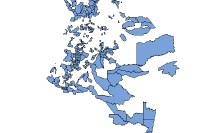

In [98]:
# Busar el id del layer
# Id shape Brigitte
#layerid = '0e333ac96feb4a9d9191bc0cd93c16cb'

# ID shape Anyela
layerid = '13f9b95bc064413cbf04cdc8e9313305'

# Buscar los features del layer
search_result = gis.content.search(layerid)
search_result[0]

In [99]:
# verificar información del layer

well_item = search_result[0]
well_layers = well_item.layers
well_layers

[<FeatureLayer url:"https://services6.arcgis.com/FLljfjHcbyOf5K3t/arcgis/rest/services/CA_DN_2022_Final/FeatureServer/0">]

In [100]:
# Acceso al editable 
well_flayer = well_layers[0]

In [101]:
# verificar la información del layer en un dataframe
well_fset = well_layers[0].query()
well_fset.sdf

,FID,nombre_ent,codigo,Departamen,HOSTIG,VIC_HOST,CONFINM,VIC_CONFIN,DESPLAZAM,VIC_DESPLA,...,Mov_soci_1,afec_mov_1,T_EVENTOS,T_AFECTA_1,AFEC_CA_DN,AFE_CA_DN,EVE_CA_DN,Shape__Area,Shape__Length,SHAPE
0,1,LETICIA,91001,Amazonas,0,0,0,0,0,0,...,0,0,4,31968,31979,SI,SI,6.217323e+09,4.332940e+05,"{""rings"": [[[-7760551.8645648, -334401.8908363..."
1,2,LA PEDRERA,91407,Amazonas,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,1.370018e+10,8.212358e+05,"{""rings"": [[[-7820757.20186743, -48250.8171581..."
2,3,LA CHORRERA,91405,Amazonas,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,1.281155e+10,1.013751e+06,"{""rings"": [[[-8125982.6779853, -59445.87949690..."
3,4,POTOSÍ,52560,Nariño,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,3.896359e+08,1.426371e+05,"{""rings"": [[[-8592395.91005221, 70238.90452960..."
4,5,ORITO,86320,Putumayo,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,1.947810e+09,2.395786e+05,"{""rings"": [[[-8545559.9641233, 88276.896119279..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1118,BARRANCO DE LOBA,13074,Bolívar,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,4.439664e+08,1.780982e+05,"{""rings"": [[[-8245637.22545121, 1000180.386747..."
1118,1119,SAN DIEGO,20750,Cesar,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,6.708952e+08,2.473591e+05,"{""rings"": [[[-8191819.5234777, 1103783.5948621..."
1119,1120,AGUA DE DIOS,25001,Cundinamarca,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,8.702766e+07,5.533847e+04,"{""rings"": [[[-8304013.96020202, 485756.8695461..."
1120,1121,TOCAIMA,25815,Cundinamarca,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,2.489073e+08,1.152257e+05,"{""rings"": [[[-8300243.39099171, 495517.0130993..."


In [102]:
actualData = pd.DataFrame(well_fset.sdf)

actualData

,FID,nombre_ent,codigo,Departamen,HOSTIG,VIC_HOST,CONFINM,VIC_CONFIN,DESPLAZAM,VIC_DESPLA,...,Mov_soci_1,afec_mov_1,T_EVENTOS,T_AFECTA_1,AFEC_CA_DN,AFE_CA_DN,EVE_CA_DN,Shape__Area,Shape__Length,SHAPE
0,1,LETICIA,91001,Amazonas,0,0,0,0,0,0,...,0,0,4,31968,31979,SI,SI,6.217323e+09,4.332940e+05,"{""rings"": [[[-7760551.8645648, -334401.8908363..."
1,2,LA PEDRERA,91407,Amazonas,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,1.370018e+10,8.212358e+05,"{""rings"": [[[-7820757.20186743, -48250.8171581..."
2,3,LA CHORRERA,91405,Amazonas,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,1.281155e+10,1.013751e+06,"{""rings"": [[[-8125982.6779853, -59445.87949690..."
3,4,POTOSÍ,52560,Nariño,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,3.896359e+08,1.426371e+05,"{""rings"": [[[-8592395.91005221, 70238.90452960..."
4,5,ORITO,86320,Putumayo,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,1.947810e+09,2.395786e+05,"{""rings"": [[[-8545559.9641233, 88276.896119279..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1118,BARRANCO DE LOBA,13074,Bolívar,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,4.439664e+08,1.780982e+05,"{""rings"": [[[-8245637.22545121, 1000180.386747..."
1118,1119,SAN DIEGO,20750,Cesar,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,6.708952e+08,2.473591e+05,"{""rings"": [[[-8191819.5234777, 1103783.5948621..."
1119,1120,AGUA DE DIOS,25001,Cundinamarca,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,8.702766e+07,5.533847e+04,"{""rings"": [[[-8304013.96020202, 485756.8695461..."
1120,1121,TOCAIMA,25815,Cundinamarca,0,0,0,0,0,0,...,0,0,0,0,0,NO,NO,2.489073e+08,1.152257e+05,"{""rings"": [[[-8300243.39099171, 495517.0130993..."


In [103]:
actualData.to_excel("/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/DataAnterior.xlsx")

In [104]:
### Cargar datos actualizados

Combinacion = pd.read_excel('/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/DataFinal.xlsx')
Combinacion

,Unnamed: 0,nombre_ent,codigo,Departamen,HOSTIG,VIC_HOST,CONFINM,VIC_CONFIN,DESPLAZAM,VIC_DESPLA,...,erosion_1,afec_ero_1,Mov_soci_1,afec_mov_1,T_EVENTOS,T_AFECTA_1,AFEC_CA_DN,AFE_CA_DN,EVE_CA_DN,geometry
0,0,LETICIA,91001,Amazonas,0,0,0,0,0,0,...,1,15000,0,0,4,31968,31980,SI,SI,POLYGON ((-69.71422353140808 -3.00260799492534...
1,1,LA PEDRERA,91407,Amazonas,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-70.25505727825332 -0.43344033098554...
2,2,LA CHORRERA,91405,Amazonas,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-72.99694438124675 -0.53400369012162...
3,3,POTOSÍ,52560,Nariño,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-77.1868057320597 0.6309540618606135...
4,4,ORITO,86320,Putumayo,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-76.76607127131831 0.792979533303785...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1117,BARRANCO DE LOBA,13074,Bolívar,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-74.07181946927707 8.948174574093795...
1118,1118,SAN DIEGO,20750,Cesar,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-73.5883668268871 9.866331347432261,..."
1119,1119,AGUA DE DIOS,25001,Cundinamarca,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-74.59622659991345 4.359415919717372...
1120,1120,TOCAIMA,25815,Cundinamarca,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-74.56235500039902 4.44683399999585,..."


In [105]:
### crear columna FID

Combinacion.rename(columns = {'Unnamed: 0':'FID'}, inplace = True)


In [106]:
contarCom = len(Combinacion.index)

Combinacion['FID']= Combinacion['FID']+1
    
Combinacion

,FID,nombre_ent,codigo,Departamen,HOSTIG,VIC_HOST,CONFINM,VIC_CONFIN,DESPLAZAM,VIC_DESPLA,...,erosion_1,afec_ero_1,Mov_soci_1,afec_mov_1,T_EVENTOS,T_AFECTA_1,AFEC_CA_DN,AFE_CA_DN,EVE_CA_DN,geometry
0,1,LETICIA,91001,Amazonas,0,0,0,0,0,0,...,1,15000,0,0,4,31968,31980,SI,SI,POLYGON ((-69.71422353140808 -3.00260799492534...
1,2,LA PEDRERA,91407,Amazonas,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-70.25505727825332 -0.43344033098554...
2,3,LA CHORRERA,91405,Amazonas,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-72.99694438124675 -0.53400369012162...
3,4,POTOSÍ,52560,Nariño,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-77.1868057320597 0.6309540618606135...
4,5,ORITO,86320,Putumayo,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-76.76607127131831 0.792979533303785...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1118,BARRANCO DE LOBA,13074,Bolívar,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-74.07181946927707 8.948174574093795...
1118,1119,SAN DIEGO,20750,Cesar,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-73.5883668268871 9.866331347432261,..."
1119,1120,AGUA DE DIOS,25001,Cundinamarca,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,POLYGON ((-74.59622659991345 4.359415919717372...
1120,1121,TOCAIMA,25815,Cundinamarca,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NO,NO,"POLYGON ((-74.56235500039902 4.44683399999585,..."


In [107]:
Combinacion.to_excel("/Users/andresmauriciotrianareina/Library/CloudStorage/OneDrive-iMMAP/Emergencias 2022/Áreas/Datos/Automatización ArcGis/CargueShapefile/DataFUID.xlsx")

### Actualizar información en ArGis

In [108]:
add_data = Combinacion.to_dict('records')

In [109]:
add_data[0]

{'FID': 1,
 'nombre_ent': 'LETICIA',
 'codigo': 91001,
 'Departamen': 'Amazonas',
 'HOSTIG': 0,
 'VIC_HOST': 0,
 'CONFINM': 0,
 'VIC_CONFIN': 0,
 'DESPLAZAM': 0,
 'VIC_DESPLA': 0,
 'RECLUT': 0,
 'VIC_RECLUT': 0,
 'SECUE': 0,
 'VIC_SECUE': 0,
 'COMBATE': 1,
 'VIC_COMBAT': 1,
 'ATENTADO': 0,
 'VIC_ATENTA': 0,
 'MASACRE': 0,
 'VIC_MASACR': 0,
 'DESA_FORZA': 0,
 'VICT_DES_F': 0,
 'AMENAZA': 0,
 'VIC_AMEN': 0,
 'HOMICIDIO': 8,
 'VIC_HOMI': 11,
 'MAP_MUS': 0,
 'VIC_MAPMUS': 0,
 'TOTAL_VICT': 12,
 'TOTAL_EVEN': 9,
 'inundac_1': 2,
 'afect_in_1': 1968,
 'deslizam_1': 1,
 'afect_de_1': 15000,
 'sequia_1': 0,
 'afec_seq_1': 0,
 'avalancha_': 0,
 'afec_ava_1': 0,
 'vendabal_1': 0,
 'afect_ve_1': 0,
 'erosion_1': 1,
 'afec_ero_1': 15000,
 'Mov_soci_1': 0,
 'afec_mov_1': 0,
 'T_EVENTOS': 4,
 'T_AFECTA_1': 31968,
 'AFEC_CA_DN': 31980,
 'AFE_CA_DN': 'SI',
 'EVE_CA_DN': 'SI',
 'geometry': 'POLYGON ((-69.71422353140808 -3.002607994925342, -69.71422454673572 -3.002613634757232, -69.71422873964397 -3.002

In [110]:
for i in range(contarCom):
    dict_data = {
        "attributes": add_data[i]
    }
    well_result = well_flayer.edit_features(updates = [dict_data])
well_result

{'addResults': [],
 'updateResults': [{'objectId': 1122,
   'uniqueId': 1122,
   'globalId': None,
   'success': True}],
 'deleteResults': []}